# OPTICS

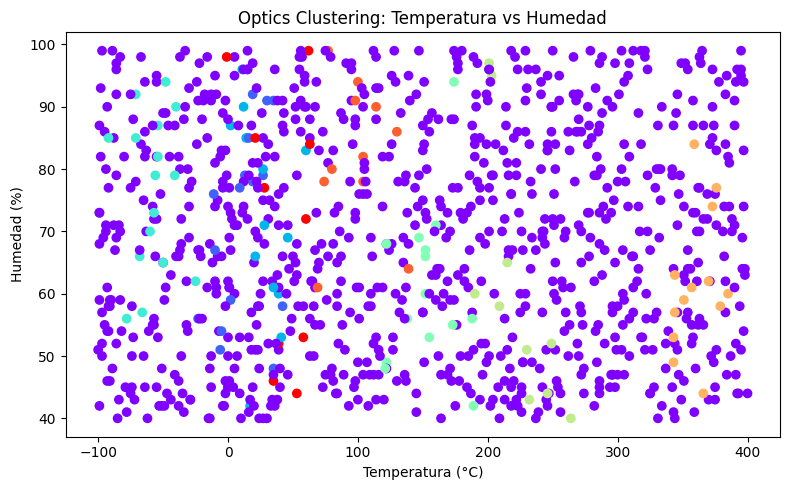

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
df = pd.read_csv('Historia_Climatica.csv')

# Escalar los datos
X = df[["Temperatura_C", "Humedad_%", "Vel_Viento_mps", "Presion_hPa"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo = OPTICS(min_samples=10)
y_pred = modelo.fit_predict(X)

# Visualización (Temperatura vs Humedad)
plt.figure(figsize=(8, 5))
plt.scatter(X["Temperatura_C"], X["Humedad_%"], c=y_pred, cmap='rainbow')
plt.title("Optics Clustering: Temperatura vs Humedad")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
# Ver cuántos clústeres fueron detectados
np.unique(y_pred, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([903,  16,  13,  16,  14,  11,  14,  11,  10]))

Resumen de clústeres detectados
- Cluster -1: 903 puntos → considerados ruido (fuera de grupos densos).
- Cluster 0: 16 puntos
- Cluster 1: 13 puntos
- Cluster 2: 16 puntos
- Cluster 3: 14 puntos
- Cluster 4: 11 puntos
- Cluster 5: 14 puntos
- Cluster 6: 11 puntos
- Cluster 7: 10 puntos

Interpretación
El algoritmo encontró 8 clústeres reales, pero la gran mayoría de los datos (903/1008) se consideran ruido, lo que puede indicar:
- Alta dispersión en los datos.
- Poca densidad local.
- Que min_samples=10 sigue siendo alto.